In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
customers = pd.read_csv(r"C:\Users\khira\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\khira\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\khira\Downloads\Transactions.csv")


In [27]:
print("Customers dataset info:")
print(customers.info())
print("\nProducts dataset info:")
print(products.info())
print("\nTransactions dataset info:")
print(transactions.info())

Customers dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [28]:
print("\nMissing values in Customers:")
print(customers.isnull().sum())
print("\nMissing values in Products:")
print(products.isnull().sum())
print("\nMissing values in Transactions:")
print(transactions.isnull().sum())


Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [29]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

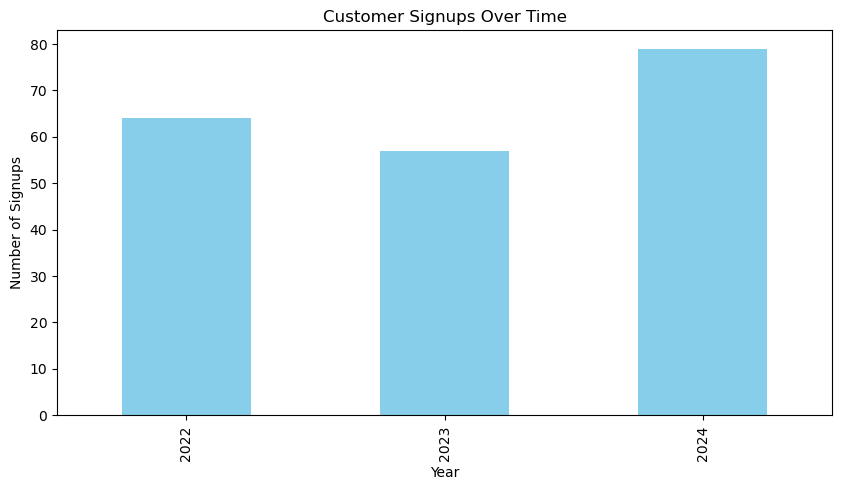

In [30]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trends.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

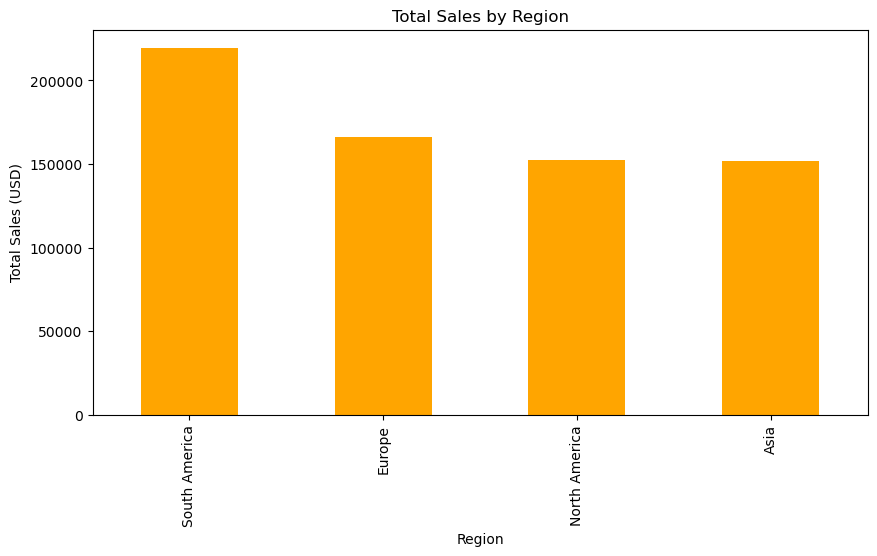

In [31]:
transactions_region = transactions.merge(customers, on='CustomerID', how='left')
region_sales = transactions_region.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()

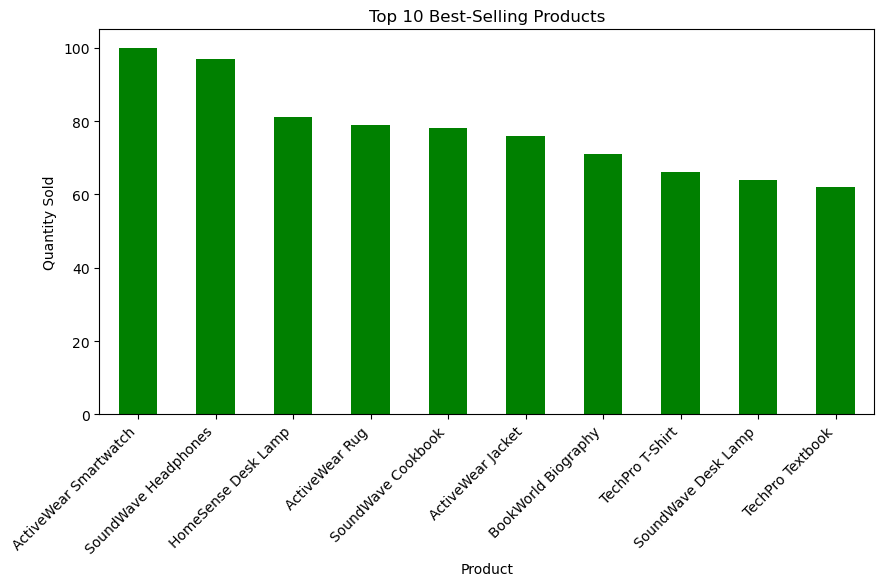

In [32]:
transactions_products = transactions.merge(products, on='ProductID', how='left')
top_products = transactions_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='green', figsize=(10, 5))
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.show()


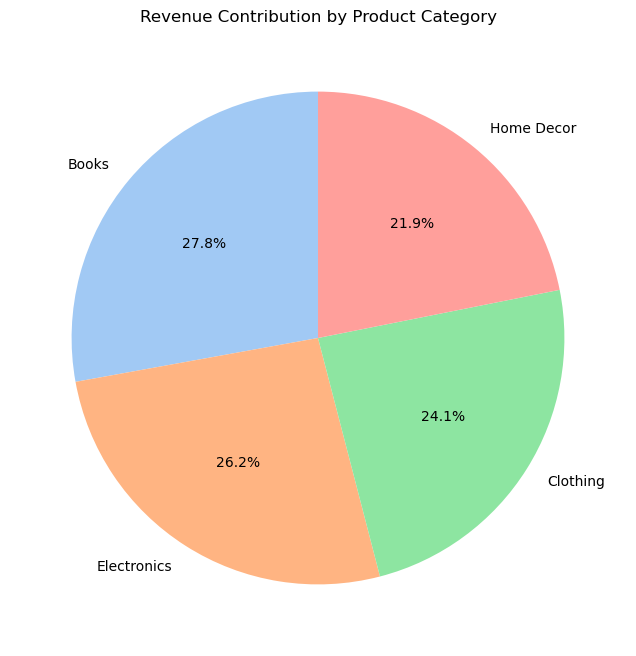

In [33]:
category_revenue = transactions_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=sns.color_palette("pastel"))
plt.title("Revenue Contribution by Product Category")
plt.ylabel("")
plt.show()


In [45]:
with open("Task1_EDA_Insights.txt", "w") as file:
    file.write(insights)
print("EDA and insights generation completed. Plots displayed and insights saved to Task1_EDA_Insights.txt.")

EDA and insights generation completed. Plots displayed and insights saved to Task1_EDA_Insights.txt.
